In [27]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. U ovom zadatku resavamo jednacinu stanja za cist vodonik. Na tabli smo izveli relaciju koja resava tri jednacine za tri nepoznate. Nepoznate su koncentracije neutralnog vodonika, protona i elektrona, a jednacine koje ih vezuju su jednacina stanja idealnog gasa $p=nkT$, jednacina koja opisuje elektroneutralnost plazme $n_e = n_p$ i Sahina jednacina koja opisuje ravnotezu izmedju $n_H$ i $n_p$. 

In [7]:
from scipy import constants

In [15]:
def resi_jednacinu_stanja_H(p, T):

    n = p / constants.k / T

    # U principu ove particione funkcije bi trebalo da se rigorozno izracunaju koristeci raznorazne pristupe iz statisticke kvantne ali
    # Za vodonik su oni 2 i 1, a ako budemo radili sa nekim drugim elementima, koristicemo neke aproksimativne tablice, tj. necemo
    # ulaziti u detalje sto se ovoga tice
    UH = 2.0 
    UP = 1.0

    E_jon = 13.6 * constants.eV

    fT = (2.0 * np.pi * constants.m_e * constants.k * T) ** 1.5 / constants.h**3.0 * 2.0 * UP / UH * np.exp(-E_jon/constants.k/T)

    ne = -fT + np.sqrt(fT**2.0 + n*fT)
    nP = ne
    nH = n - 2*ne

    return nH, nP, ne

In [16]:
print(resi_jednacinu_stanja_H(1E4, 5800))

(1.2485032328278944e+23, 1.4239358949414828e+19, 1.4239358949414828e+19)


In [17]:
print(resi_jednacinu_stanja_H(1E0, 5800))

(1.2206290061823703e+19, 1.4079506912256248e+17, 1.4079506912256248e+17)


In [18]:
print(resi_jednacinu_stanja_H(1E4, 7000))

(1.0316391927361457e+23, 1.535440491921342e+20, 1.535440491921342e+20)


In [23]:
print(resi_jednacinu_stanja_H(1E0, 10000))

(3.840552758882509e+16, 3.6022824942255473e+18, 3.6022824942255473e+18)


#### 2. Na osnovu koda iz prethodnog zadatka sada radimo poredjenje izmedju koncentracije neutralnog vodonika u stanjima i =2 i i=3, i koncentracije negativnog jona vodonika, H-.

Pri tom cemo predpostaviti da pristustvo H- ne menja bitno koncentraciju elektrona, tj. da je koncentracija elektrona odredjenja prethodnim zadatkom.

In [24]:
def odredi_H_minus(nH, ne, T):

    UH = 2.0 
    UHm = 1.0

    E_jon = 0.75 * constants.eV

    fT2 = (2.0 * np.pi * constants.m_e * constants.k * T) ** 1.5 / constants.h**3.0 * 2.0 * UH / UHm * np.exp(-E_jon/constants.k/T)

    nHm = nH*ne / fT2
    
    return nHm

In [32]:
# Hajde da proverimo prvo na uslovima iz fotosfere: 
p = 1E4
T = 5800.0

nH, nP, ne = resi_jednacinu_stanja_H(p, T)
nHm = odredi_H_minus(nH, ne, T)
print("%e %e %e" % (nH, nP, ne))
print(f"{nHm:.2e}")

1.248503e+23 1.423936e+19 1.423936e+19
1.87e+15


#### Ne zaboravite da je ideja da ovo uporedimo sa "populacijom" nivoa 2 i 3 u neutralnom vodoniku. Populacija nekog stanje je koncentracija cestica u tom stanju. Dakle, idemo:

In [36]:
def odredi_n_123(nH, T):

    # Ovde cemo sada primeniti Bolcmanovu raspodelu
    g1 = 2.0
    g2 = 8.0
    g3 = 18.0

    E1 = 0.0
    E2 = 13.6 * (1.0/1.0**2.0 - 1.0/2.0**2.0) * constants.eV
    E3 = 13.6 * (1.0/1.0**2.0 - 1.0/3.0**2.0) * constants.eV

    U = 2.0
    n1 = g1 * np.exp(-E1/constants.k/T) / U * nH
    n2 = g2 * np.exp(-E2/constants.k/T) / U * nH
    n3 = g3 * np.exp(-E3/constants.k/T) / U * nH

    return n1,n2,n3

In [37]:
n1,n2,n3 = odredi_n_123(nH, T)
print("%e %e %e" % (n1, n2, n3))

1.248503e+23 6.845284e+14 3.517766e+13


#### Hajde sada da malo ispitujemo kako se ovi odnosi menjaju sa temperaturom i pritiskom. 
#### Fiksirajmo prvo pritisak na neku vrednost i analizirajmo odnos izmedju koncentracija Hminus i n2 n3 u zavisnosti od temperature.

In [38]:
p = 1E4
T = np.linspace(4000.0, 20000.0, 33)

In [39]:
nH, nP, ne = resi_jednacinu_stanja_H(p, T)
nHm = odredi_H_minus(nH, ne, T)
n1,n2,n3 = odredi_n_123(nH, T)

Text(0, 0.5, '$n \\mathrm{[m^{-3}]}$')

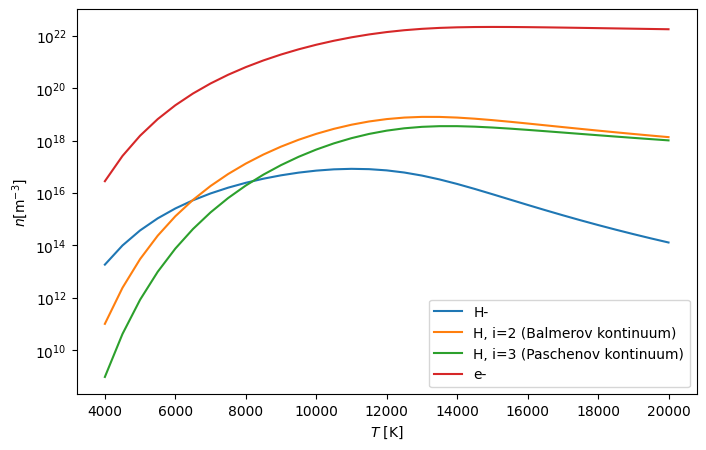

In [42]:
# isplotujemo ovo na brzaka 
plt.figure(figsize=[8,5])
plt.semilogy(T, nHm, label='H-')
plt.semilogy(T, n2, label='H, i=2 (Balmerov kontinuum)')
plt.semilogy(T, n3, label='H, i=3 (Paschenov kontinuum)')
plt.semilogy(T, ne, label='e-')
plt.legend()
plt.xlabel("$T$ [K]")
plt.ylabel("$n \\mathrm{[m^{-3}]}$")


Text(0, 0.5, '$n \\mathrm{[m^{-3}]}$')

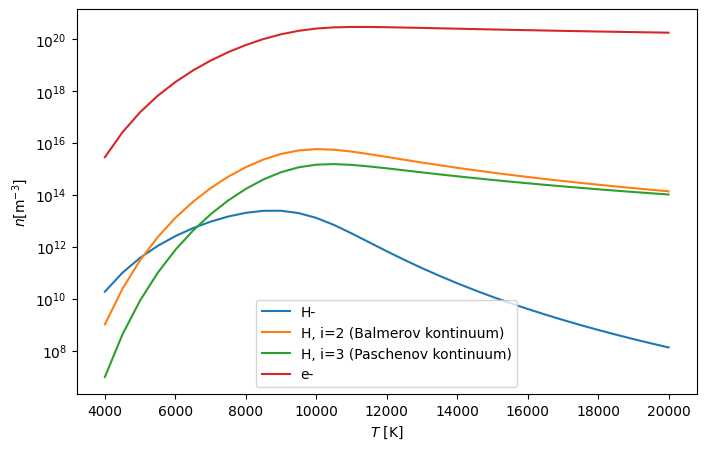

In [43]:
# Sve ovo isto za neki manji pritisak

p = 1E2
T = np.linspace(4000.0, 20000.0, 33)

nH, nP, ne = resi_jednacinu_stanja_H(p, T)
nHm = odredi_H_minus(nH, ne, T)
n1,n2,n3 = odredi_n_123(nH, T)

# isplotujemo ovo na brzaka 
plt.figure(figsize=[8,5])
plt.semilogy(T, nHm, label='H-')
plt.semilogy(T, n2, label='H, i=2 (Balmerov kontinuum)')
plt.semilogy(T, n3, label='H, i=3 (Paschenov kontinuum)')
plt.semilogy(T, ne, label='e-')
plt.legend()
plt.xlabel("$T$ [K]")
plt.ylabel("$n \\mathrm{[m^{-3}]}$")